<a href="https://colab.research.google.com/github/Nachi2006/Regressions/blob/main/Regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# ===============================
# 1. Import Required Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Models and evaluation tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Set seaborn style for better looking plots
sns.set(style="whitegrid", palette="muted", font_scale=1.1)




In [12]:
# ===============================
# 2. Load Dataset from UCI Archive
# ===============================
# We'll use the Wine Quality dataset (red wine)
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(url, sep=';')


In [13]:
# ===============================
# 3. Initial Data Exploration
# ===============================
print("First 5 rows of the dataset:")
display(data.head())

print("\nDataset Info:")
data.info()

print("\nSummary statistics:")
display(data.describe())


First 5 rows of the dataset:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

Summary statistics:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000



Missing values in each column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Number of duplicate rows: 240
Duplicates dropped.


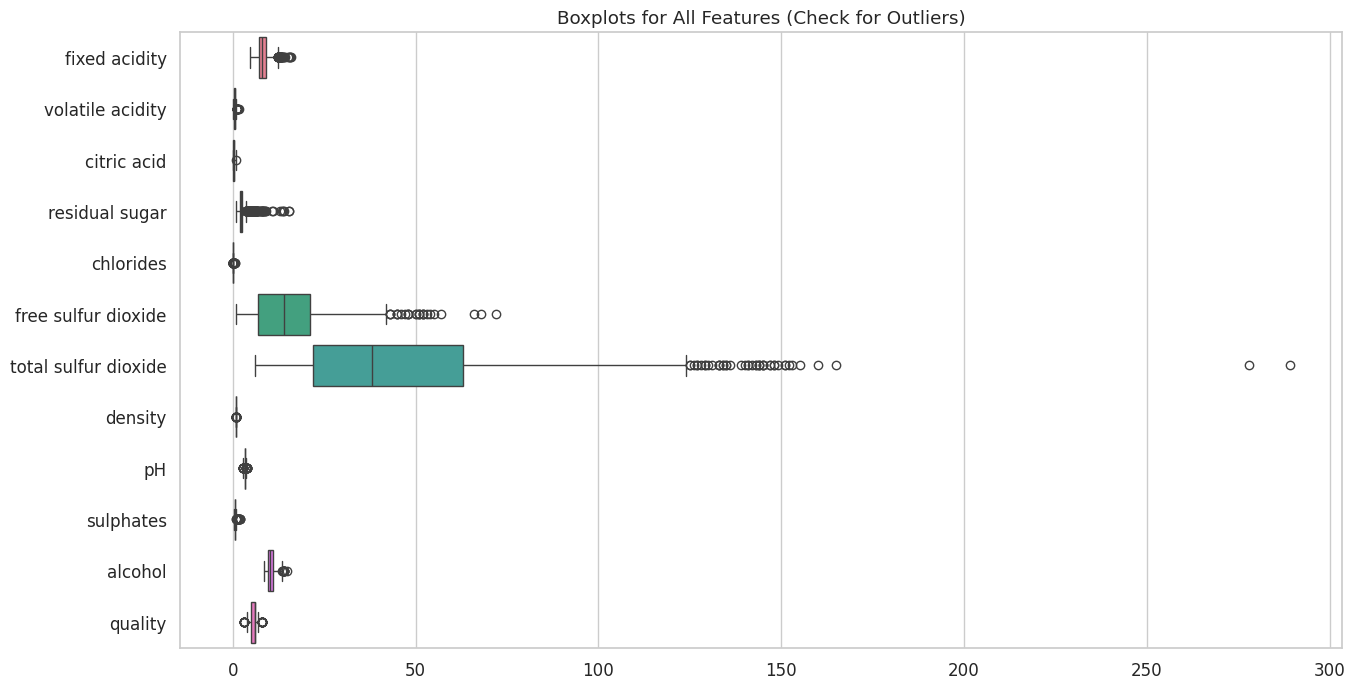

In [14]:
# ===============================
# 4. Data Cleaning & Preprocessing
# ===============================

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# The dataset has no missing values. If there were, we could fill or drop them.

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Drop duplicates if any
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates dropped.")

# Check for outliers using boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=data, orient="h")
plt.title("Boxplots for All Features (Check for Outliers)")
plt.show()

# For this workshop, we will not remove outliers, but in real projects, you may want to handle them.


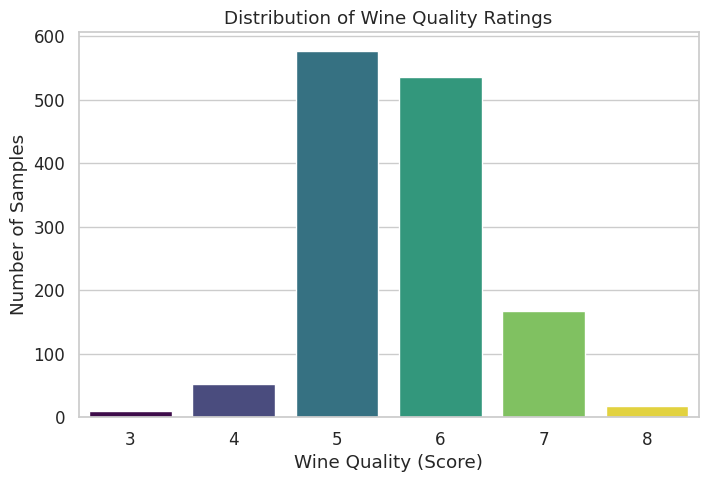

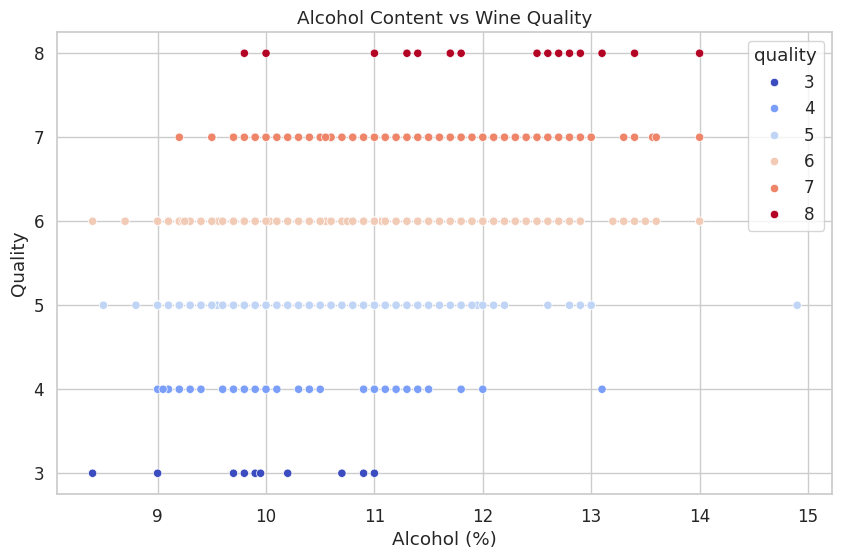

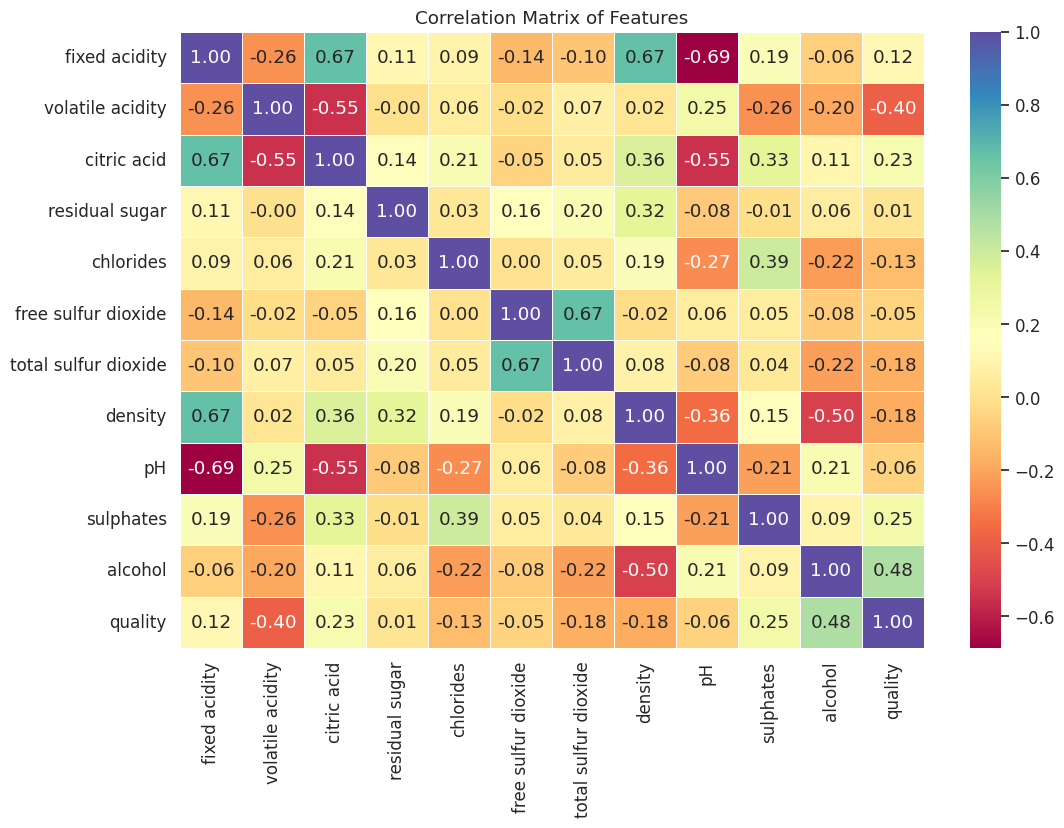

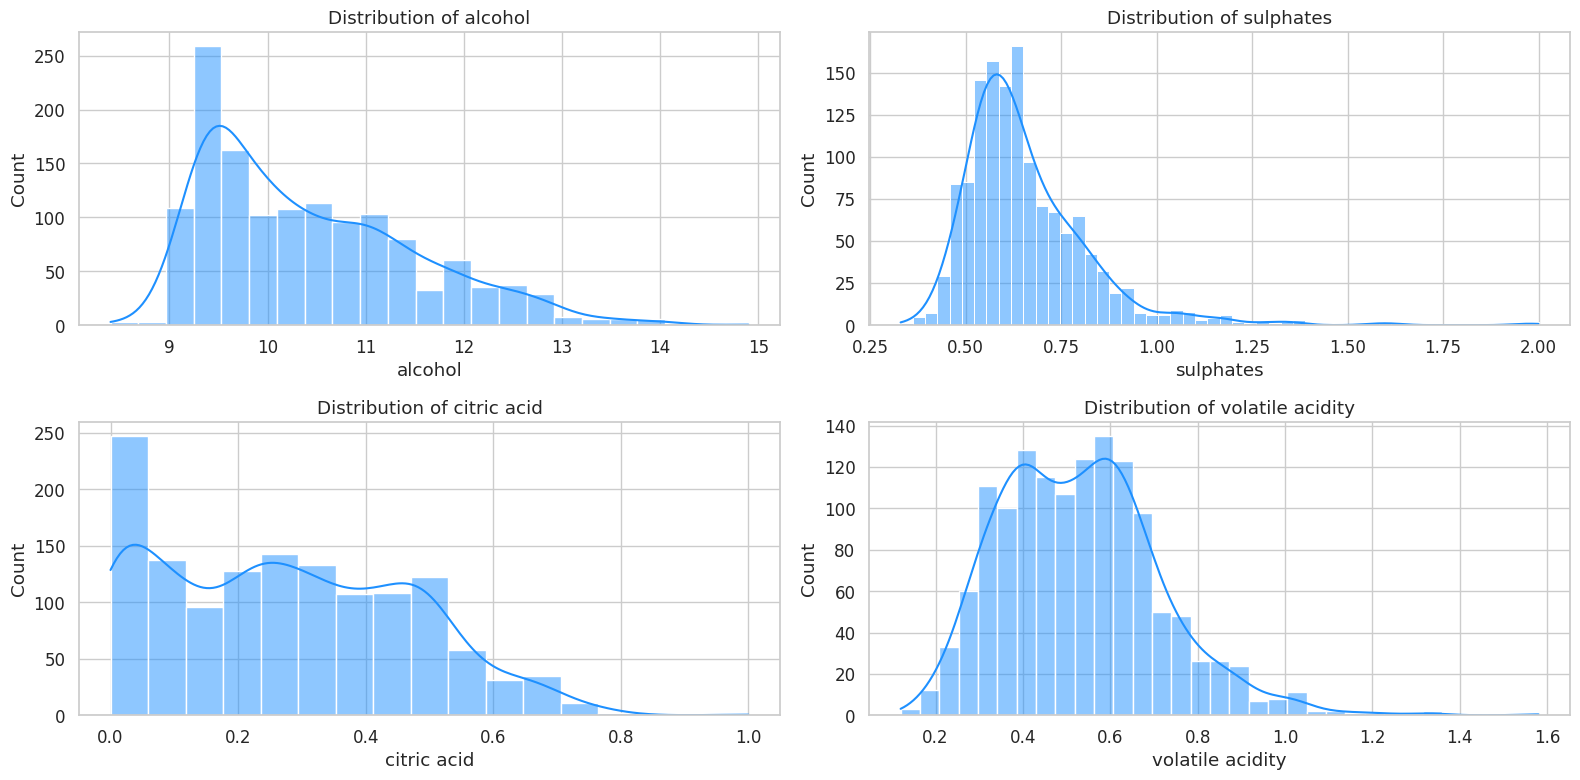

In [16]:
# ===============================
# 5. Data Visualization
# ===============================

# Visualize the distribution of the target variable 'quality'
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', hue='quality',data=data, palette='viridis',legend=False)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Wine Quality (Score)')
plt.ylabel('Number of Samples')
plt.show()

# Visualize pairwise relationships between features and 'quality'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='alcohol', y='quality', data=data, hue='quality', palette='coolwarm')
plt.title('Alcohol Content vs Wine Quality')
plt.xlabel('Alcohol (%)')
plt.ylabel('Quality')
plt.show()

# Correlation heatmap to see which features are most related to 'quality'
plt.figure(figsize=(12, 8))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Spectral', linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# Visualize the distribution of a few important features
features_to_plot = ['alcohol', 'sulphates', 'citric acid', 'volatile acidity']
plt.figure(figsize=(16, 8))
for idx, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(data[feature], kde=True, color='dodgerblue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

In [17]:
# ===============================
# 6. Prepare Data for Regression
# ===============================

# Separate features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


--- Linear Regression ---
Mean Squared Error: 0.43
R2 Score: 0.39


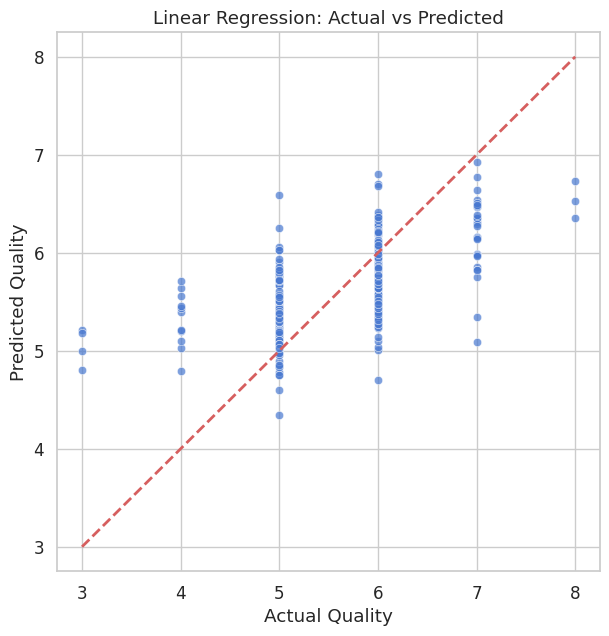

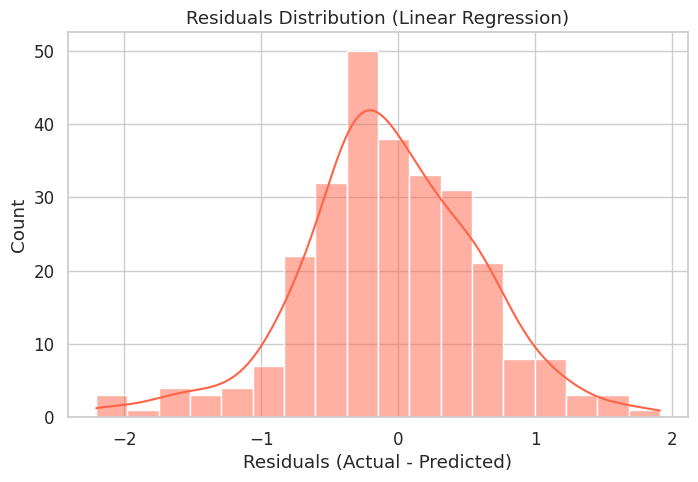

In [18]:

# ===============================
# 7. Linear Regression
# ===============================

# Create and train the model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predict on test set
y_pred_lin = lin_reg.predict(X_test)

# Evaluate the model
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("\n--- Linear Regression ---")
print(f"Mean Squared Error: {mse_lin:.2f}")
print(f"R2 Score: {r2_lin:.2f}")

# Visualize actual vs predicted values
plt.figure(figsize=(7, 7))
sns.scatterplot(x=y_test, y=y_pred_lin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

# Residual plot (errors)
residuals = y_test - y_pred_lin
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, color='tomato')
plt.title("Residuals Distribution (Linear Regression)")
plt.xlabel("Residuals (Actual - Predicted)")
plt.show()


In [19]:

# ===============================
# 8. Ridge Regression (L2 Regularization)
# ===============================
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("\n--- Ridge Regression ---")
print(f"Mean Squared Error: {mse_ridge:.2f}")
print(f"R2 Score: {r2_ridge:.2f}")


--- Ridge Regression ---
Mean Squared Error: 0.43
R2 Score: 0.40


In [20]:
# ===============================
# 9. Lasso Regression (L1 Regularization)
# ===============================
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("\n--- Lasso Regression ---")
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R2 Score: {r2_lasso:.2f}")



--- Lasso Regression ---
Mean Squared Error: 0.55
R2 Score: 0.22


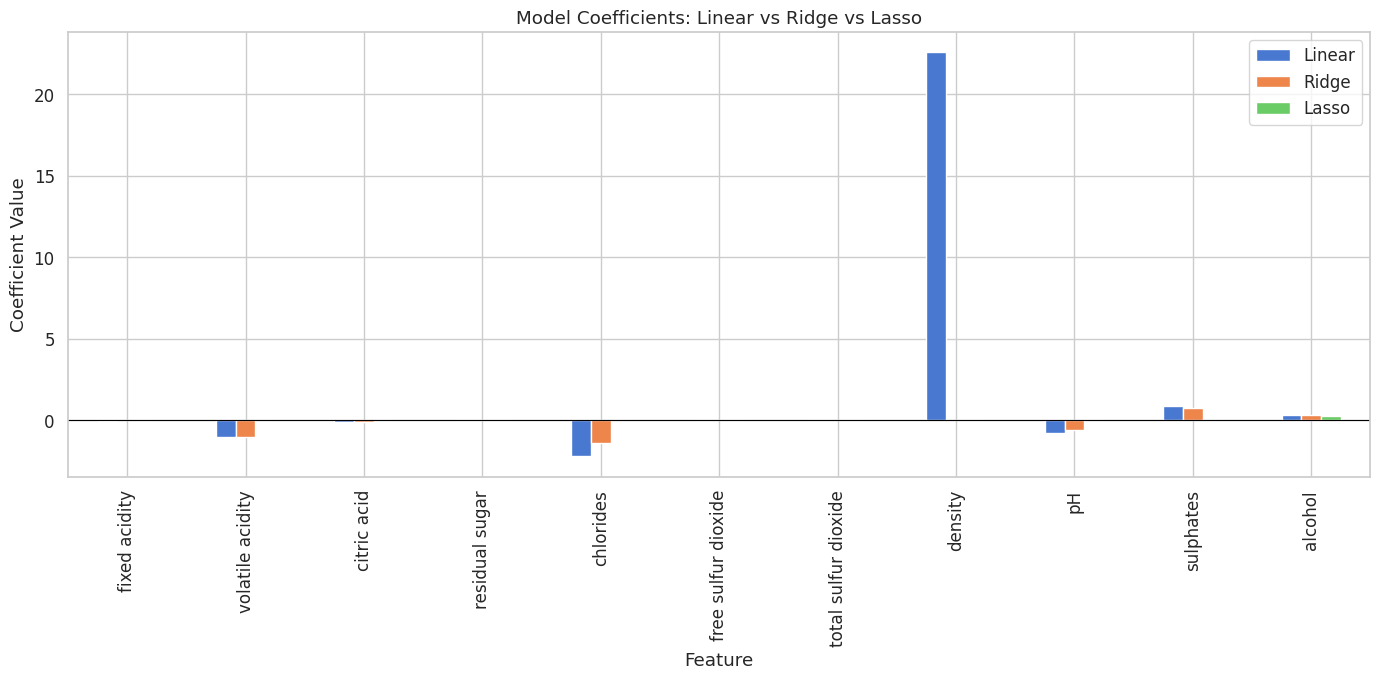

In [21]:
# ===============================
# 10. Visualize Coefficients for All Regressions
# ===============================

coefs = pd.DataFrame({
    'Feature': X.columns,
    'Linear': lin_reg.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})

coefs.set_index('Feature').plot(kind='bar', figsize=(14, 7))
plt.title('Model Coefficients: Linear vs Ridge vs Lasso')
plt.ylabel('Coefficient Value')
plt.axhline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()





--- Logistic Regression (Binary Classification) ---
Accuracy: 0.89

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       238
           1       0.67      0.29      0.41        34

    accuracy                           0.89       272
   macro avg       0.79      0.64      0.67       272
weighted avg       0.88      0.89      0.87       272



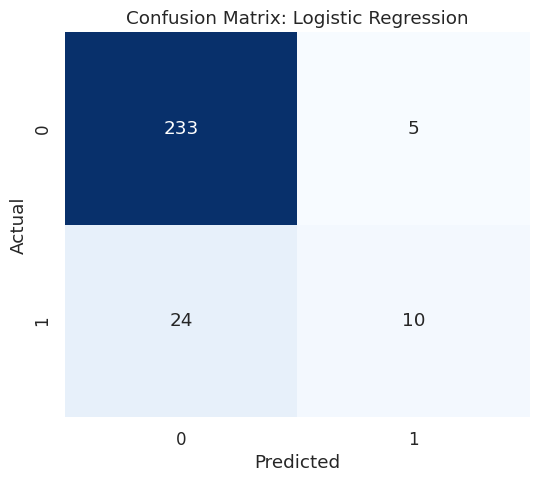

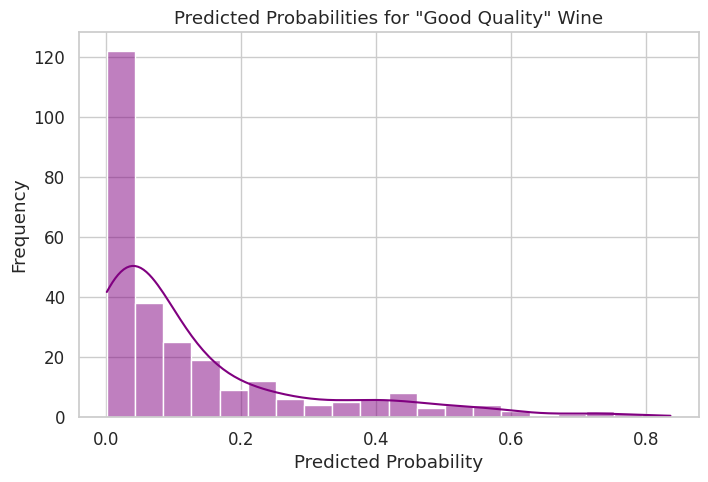

In [22]:

# ===============================
# 11. Logistic Regression (Binary Classification)
# ===============================
# We'll convert 'quality' into binary: Good (>=7), Not Good (<7)
data['good_quality'] = (data['quality'] >= 7).astype(int)

# Features and target for classification
X_bin = data.drop(['quality', 'good_quality'], axis=1)
y_bin = data['good_quality']

# Split for classification
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.2, random_state=42
)

# Train logistic regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_bin, y_train_bin)
y_pred_log = log_reg.predict(X_test_bin)

# Evaluate
acc_log = accuracy_score(y_test_bin, y_pred_log)
print("\n--- Logistic Regression (Binary Classification) ---")
print(f"Accuracy: {acc_log:.2f}")
print("\nClassification Report:")
print(classification_report(y_test_bin, y_pred_log))

# Confusion matrix visualization
cm = confusion_matrix(y_test_bin, y_pred_log)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix: Logistic Regression')
plt.show()

# Visualize probability predictions
y_prob_log = log_reg.predict_proba(X_test_bin)[:, 1]
plt.figure(figsize=(8, 5))
sns.histplot(y_prob_log, bins=20, kde=True, color='purple')
plt.title('Predicted Probabilities for "Good Quality" Wine')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()